##**Ehancing Tourism Management Through Sales Prediction Models**

The dataset contains 1,212 entries and 10 columns. Here's an overview:


S.No.: Serial number (integer)

State: Name of the state (string)

City: Name of the city (string)

Category: Hotel star rating (string)

Alcohol: Availability of alcohol (string, with many missing values)

Hotel Name: Name of the hotel (string)

Address: Hotel address (string)

Start Date: (string)



Total Rooms: Number of rooms in the hotel (integer)

**Preprocessing Steps:**

*Handle Missing Values:*


The "Alcohol" column has missing values. We can either fill them with a placeholder or drop the column if it's not relevant.

*Convert Date Columns:*

Convert the "Start Date" and "Expiry Date" columns to datetime format for easier manipulation.

*Feature Engineering:*

Extract year, month, and duration from the "Start Date" and "Expiry Date" columns.


*Encode Categorical Variables:*

Convert categorical columns like "State", "City", and "Category" into numerical format using techniques like one-hot encoding or label encoding.

*Stationarity Check for Time Series Data:*

If the dataset involves time series analysis, check for stationarity using the Augmented Dickey-Fuller (ADF) test.
Apply transformations (e.g., differencing) to make the series stationary if necessary.

*Plotting:*

Plot the time series data, correlation matrix, and other relevant visualizations for understanding data distribution and relationships.

In [1]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('/content/csv_data (1).csv')
data.head()


,S.No.,State,City,Category,Alcohol,Hotel Name,Address,Start Date,Expiry Date,Total Rooms
0,1,Delhi,New Delhi,1 Star,NaN,Hotel LA (A unit of L A Hotels And Retreats Pv...,"plot no A-1, Community Centre, Road No 43, Man...",20/01/2020,19/01/2025,35
1,2,Gujarat,Adalaj,1 Star,NaN,"Amba Suites, Unit of Amba Township Private Lim...","Amba Business Park, Shivam â€“ II, Sub-Plot No...",15/07/2022,14/07/2027,64
2,3,Gujarat,Ahmedabad,1 Star,NaN,Hotel Pragati The Grand (A Unit of Pragati The...,"SP-2,FP 2342,PAIKI, NR ZYDUS CADILA HOSPITAL,H...",22/09/2021,21/09/2026,45
3,4,Gujarat,Ahmedabad,1 Star,NaN,Hotel Rezaas,"375-1, Sheetal Baug, Nr. Girish Cold Drink, Of...",31/10/2018,30/10/2023,38
4,5,Gujarat,Anand,1 Star,NaN,HOTEL ARIZONA INN,"OPP. S R PARK, ANAND- SOJITRA ROAD, ANAND- 388001",01/09/2020,31/08/2025,28


In [ ]:
data.shape

(1212, 10)

In [ ]:
data.isnull().sum()

,0
S.No.,0
State,0
City,0
Category,0
Alcohol,536
Hotel Name,0
Address,0
Start Date,0
Expiry Date,0
Total Rooms,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   S.No.        1212 non-null   int64 
 1   State        1212 non-null   object
 2   City         1212 non-null   object
 3   Category     1212 non-null   object
 4   Alcohol      676 non-null    object
 5   Hotel Name   1212 non-null   object
 6   Address      1212 non-null   object
 7   Start Date   1212 non-null   object
 8   Expiry Date  1212 non-null   object
 9   Total Rooms  1212 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 94.8+ KB


In [ ]:
data.duplicated().sum()

0

In [ ]:
#converting feature names to lower case
for col in data.columns:
    data.rename(columns={col:col.lower()}, inplace=True)

In [ ]:
data.columns

Index(['s.no.', 'state', 'city', 'category', 'alcohol', 'hotel name',
       'address', 'start date', 'expiry date', 'total rooms'],
      dtype='object')

In [ ]:
data['alcohol'].value_counts(normalize=True, dropna=False)

,proportion
alcohol,
NaN,0.442244
With Alcohol,0.405941
Without Alcohol,0.151815


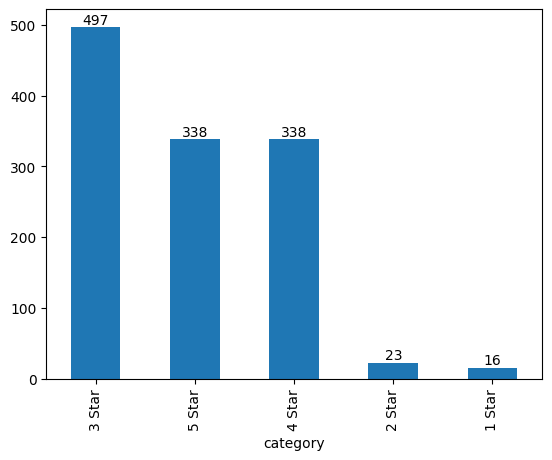

In [ ]:
ax = data.category.value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)


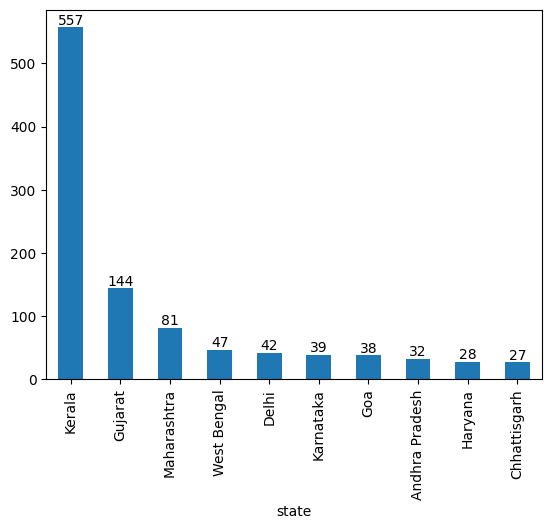

In [ ]:
ax = data.state.value_counts().nlargest(10).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

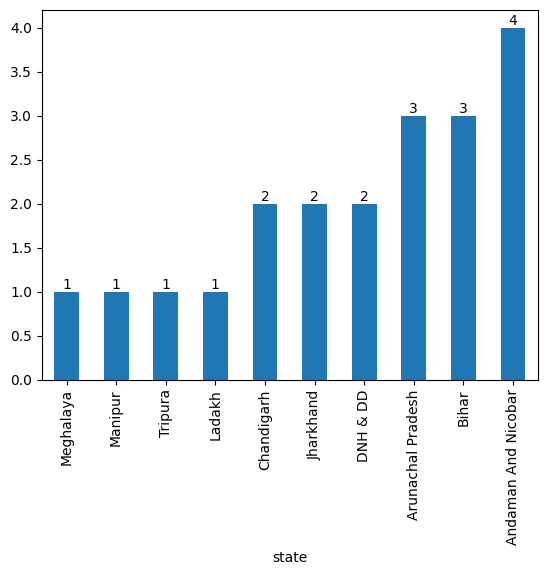

In [ ]:
ax = data.state.value_counts().nsmallest(10).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

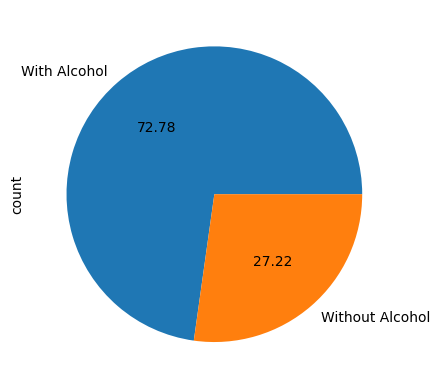

In [ ]:
from matplotlib import pyplot as plt
data.alcohol.value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

In [ ]:
# Calculate the IQR for the 'Total Rooms' column
Q1 = data['total rooms'].quantile(0.25)
Q3 = data['total rooms'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = data[(data['total rooms'] < lower_bound) | (data['total rooms'] > upper_bound)]

print("Outliers using IQR method:")
print(outliers_iqr)



Outliers using IQR method:
      s.no.          state       city category       alcohol  \
161     162      Karnataka  Bangalore   3 Star           NaN   
550     551          Delhi      Delhi   4 Star  With Alcohol   
558     559          Delhi  New Delhi   4 Star  With Alcohol   
691     692    Maharashtra     Mumbai   4 Star  With Alcohol   
700     701    Maharashtra     Mumbai   4 Star  With Alcohol   
...     ...            ...        ...      ...           ...   
1148   1149      Telangana  Hyderabad   5 Star  With Alcohol   
1149   1150  Uttar Pradesh       Agra   5 Star  With Alcohol   
1150   1151  Uttar Pradesh       Agra   5 Star  With Alcohol   
1158   1159    West Bengal    Kolkata   5 Star  With Alcohol   
1159   1160    West Bengal    Kolkata   5 Star  With Alcohol   

                                             hotel name  \
161   Holiday Inn Express and Suites Bengaluru, OMR,...   
550                                          HOLIDAYINN   
558                        

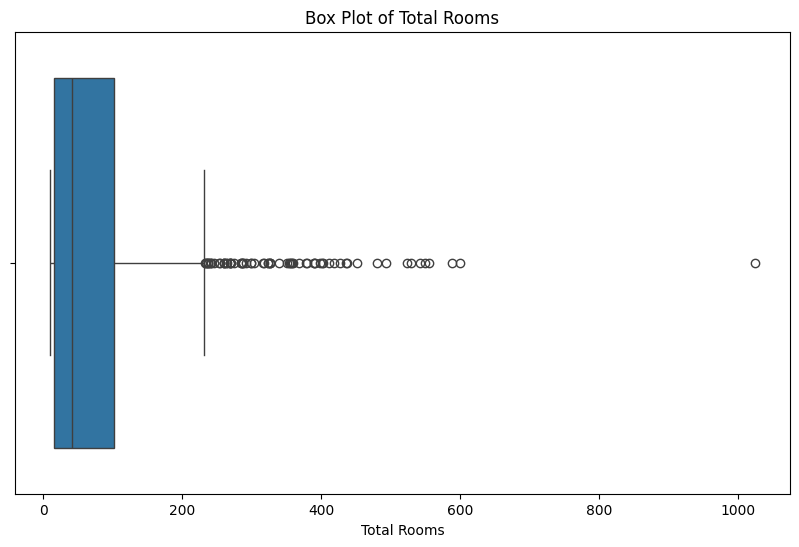

In [ ]:
import seaborn as sns
# Create a box plot for 'Total Rooms'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['total rooms'])
plt.title('Box Plot of Total Rooms')
plt.xlabel('Total Rooms')
plt.show()

In [ ]:
from scipy import stats

# Calculate the Z-scores
data['z_score'] = stats.zscore(data['total rooms'])

# Define the threshold for identifying outliers
threshold = 3

# Identify outliers
outliers_z = data[data['z_score'].abs() > threshold]

print("Outliers using Z-score method:")
print(outliers_z)


Outliers using Z-score method:
      s.no.          state       city category       alcohol  \
558     559          Delhi  New Delhi   4 Star  With Alcohol   
700     701    Maharashtra     Mumbai   4 Star  With Alcohol   
960     961    Maharashtra       Pune   5 Star  With Alcohol   
996     997  Uttar Pradesh      Noida   5 Star  With Alcohol   
1020   1021          Delhi      Delhi   5 Star  With Alcohol   
1022   1023          Delhi      Delhi   5 Star  With Alcohol   
1023   1024          Delhi      Delhi   5 Star  With Alcohol   
1025   1026          Delhi      Delhi   5 Star  With Alcohol   
1030   1031          Delhi  New Delhi   5 Star  With Alcohol   
1032   1033          Delhi  New Delhi   5 Star  With Alcohol   
1035   1036          Delhi  New Delhi   5 Star  With Alcohol   
1036   1037          Delhi  New Delhi   5 Star  With Alcohol   
1037   1038          Delhi  New Delhi   5 Star  With Alcohol   
1063   1064        Haryana    Gurgaon   5 Star  With Alcohol   
1066   10

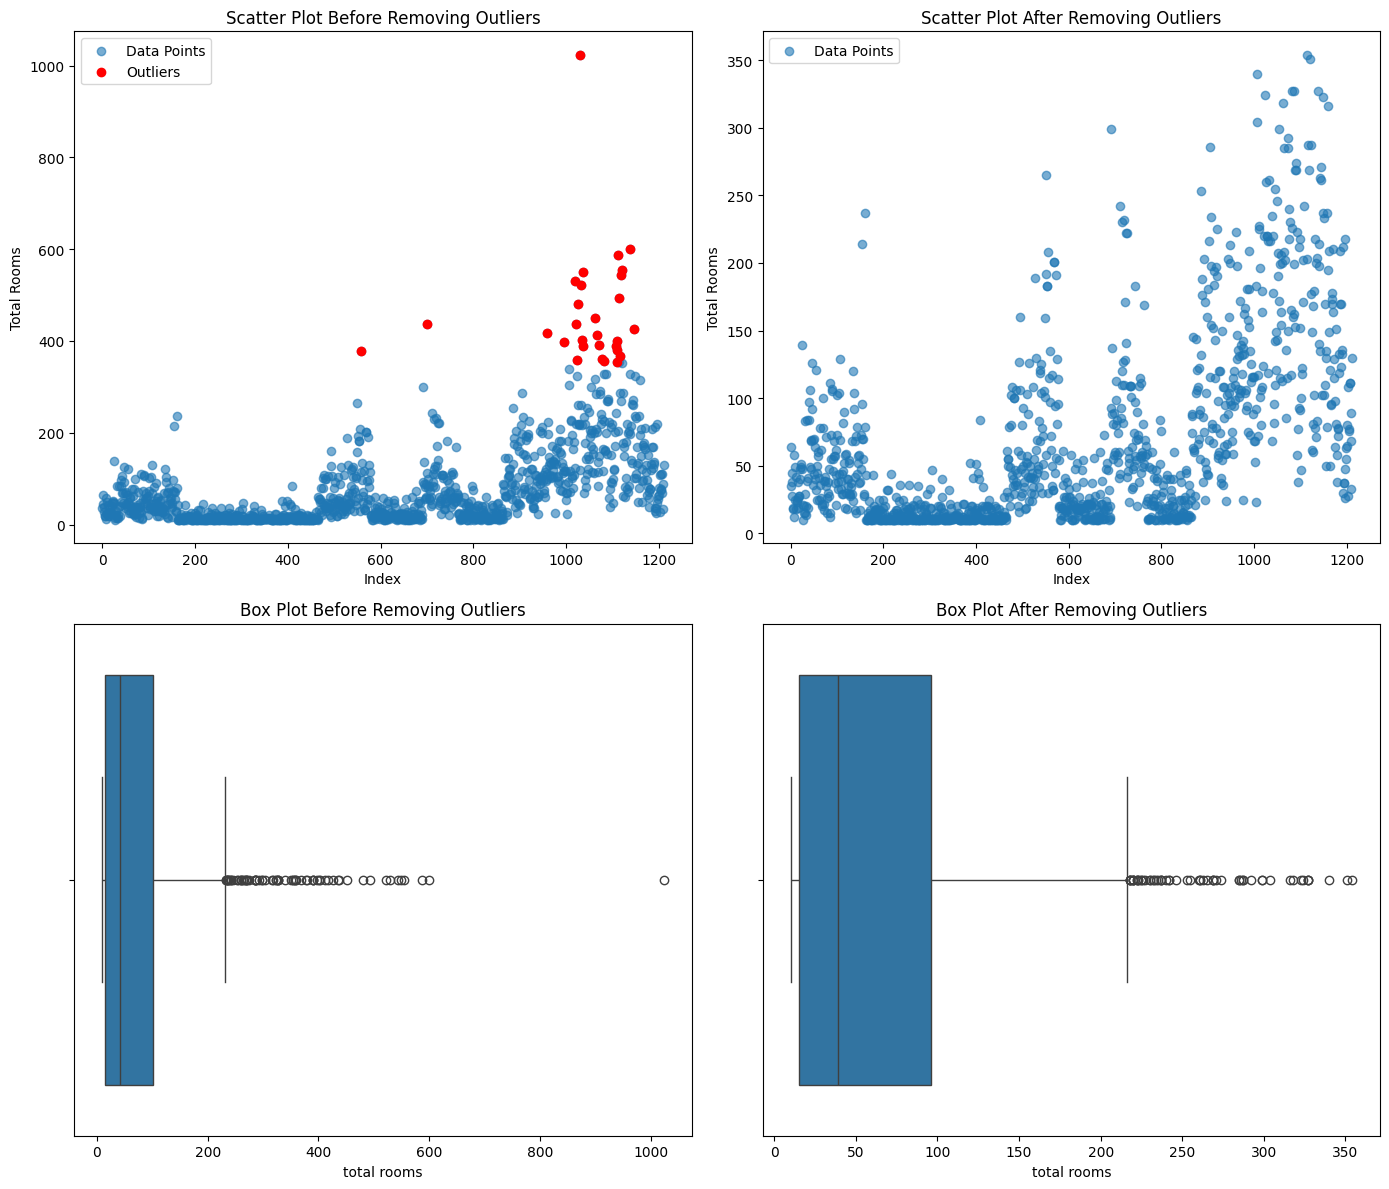

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Calculate the Z-scores
data['z_score'] = stats.zscore(data['total rooms'])

# Define the threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = data[data['z_score'].abs() > threshold]

# Remove outliers
df_no_outliers_z = data[data['z_score'].abs() <= threshold]


df_no_outliers_z = df_no_outliers_z.drop(columns=['z_score'])

# Save the cleaned data
df_no_outliers_z.to_csv('cleaned_data_z.csv', index=False)

#print("Data with outliers removed (Z-score method):")
#print(df_no_outliers_z)

# Plotting

# Create scatter plots
plt.figure(figsize=(14, 12))

# Scatter plot before removing outliers
plt.subplot(2, 2, 1)
plt.scatter(data.index, data['total rooms'], label='Data Points', alpha=0.6)
plt.scatter(outliers.index, outliers['total rooms'], color='red', label='Outliers', marker='o')
plt.title('Scatter Plot Before Removing Outliers')
plt.xlabel('Index')
plt.ylabel('Total Rooms')
plt.legend()

# Scatter plot after removing outliers
plt.subplot(2, 2, 2)
plt.scatter(df_no_outliers_z.index, df_no_outliers_z['total rooms'], label='Data Points', alpha=0.6)
plt.title('Scatter Plot After Removing Outliers')
plt.xlabel('Index')
plt.ylabel('Total Rooms')
plt.legend()

# Box plots
plt.subplot(2, 2, 3)
sns.boxplot(x=data['total rooms'])
plt.title('Box Plot Before Removing Outliers')

plt.subplot(2, 2, 4)
sns.boxplot(x=df_no_outliers_z['total rooms'])
plt.title('Box Plot After Removing Outliers')

plt.tight_layout()
plt.show()


**One hot encoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# List of categorical columns to encode
categorical_columns = ['state', 'city', 'category']

# Apply One-Hot Encoding to the categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Display the first few rows of the encoded data
print(data_encoded.head())


   s.no. alcohol                                         hotel name  \
1      2     NaN  Amba Suites, Unit of Amba Township Private Lim...   
2      3     NaN  Hotel Pragati The Grand (A Unit of Pragati The...   
3      4     NaN                                       Hotel Rezaas   
4      5     NaN                                  HOTEL ARIZONA INN   
5      6     NaN                             Blackbuck Safari Lodge   

                                             address start date expiry date  \
1  Amba Business Park, Shivam â€“ II, Sub-Plot No... 2022-07-15  2027-07-14   
2  SP-2,FP 2342,PAIKI, NR ZYDUS CADILA HOSPITAL,H... 2021-09-22  2026-09-21   
3  375-1, Sheetal Baug, Nr. Girish Cold Drink, Of... 2018-10-31  2023-10-30   
4  OPP. S R PARK, ANAND- SOJITRA ROAD, ANAND- 388001 2020-09-01  2025-08-31   
5  Near Narmada Canal, Velavadar- Ayodhyapuram Ro... 2022-04-19  2027-04-18   

   total rooms  Start Year  Expiry Year  Duration (Years)  ...  city_Zirakpur  \
1           64   

**Label Encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['state', 'city', 'category']

# Apply Label Encoding to each categorical column
for col in categorical_columns:
    data[col + '_encoded'] = label_encoder.fit_transform(data[col])

# Display the first few rows of the encoded data
print(data.head())


   s.no.    state       city category alcohol  \
1      2  Gujarat     Adalaj   1 Star     NaN   
2      3  Gujarat  Ahmedabad   1 Star     NaN   
3      4  Gujarat  Ahmedabad   1 Star     NaN   
4      5  Gujarat      Anand   1 Star     NaN   
5      6  Gujarat  Bhavnagar   1 Star     NaN   

                                          hotel name  \
1  Amba Suites, Unit of Amba Township Private Lim...   
2  Hotel Pragati The Grand (A Unit of Pragati The...   
3                                       Hotel Rezaas   
4                                  HOTEL ARIZONA INN   
5                             Blackbuck Safari Lodge   

                                             address start date expiry date  \
1  Amba Business Park, Shivam â€“ II, Sub-Plot No... 2022-07-15  2027-07-14   
2  SP-2,FP 2342,PAIKI, NR ZYDUS CADILA HOSPITAL,H... 2021-09-22  2026-09-21   
3  375-1, Sheetal Baug, Nr. Girish Cold Drink, Of... 2018-10-31  2023-10-30   
4  OPP. S R PARK, ANAND- SOJITRA ROAD, ANAND- 388001

<ipython-input-37-089341846484>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_encoded'] = label_encoder.fit_transform(data[col])
<ipython-input-37-089341846484>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_encoded'] = label_encoder.fit_transform(data[col])
<ipython-input-37-089341846484>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from pandas import to_datetime, Timedelta

In [ ]:
# Display the column names
print(data.columns.tolist())


['s.no.', 'state', 'city', 'category', 'alcohol', 'hotel name', 'address', 'expiry date', 'total rooms', 'z_score', 'Total Rooms Diff']


In [ ]:
# Convert 'Start Date' and 'Expiry Date' to datetime format
data['start date'] = to_datetime(data['start date'], format='%d/%m/%Y')
data['expiry date'] = to_datetime(data['expiry date'], format='%d/%m/%Y')
print(data[['start date', 'expiry date']].head())

  start date expiry date
0 2020-01-20  2025-01-19
1 2022-07-15  2027-07-14
2 2021-09-22  2026-09-21
3 2018-10-31  2023-10-30
4 2020-09-01  2025-08-31


In [ ]:
# Feature Engineering: Extracting year, month, and duration
data['Start Year'] = data['start date'].dt.year
data['Expiry Year'] = data['expiry date'].dt.year
data['Duration (Years)'] = (data['expiry date'] - data['start date']) / Timedelta(days=365)
print(data[['Start Year', 'Expiry Year', 'Duration (Years)']].head())

   Start Year  Expiry Year  Duration (Years)
0        2020         2025           5.00274
1        2022         2027           5.00000
2        2021         2026           5.00000
3        2018         2023           5.00000
4        2020         2025           5.00000


 **Time Series Preprocessing and Stationarity Check**

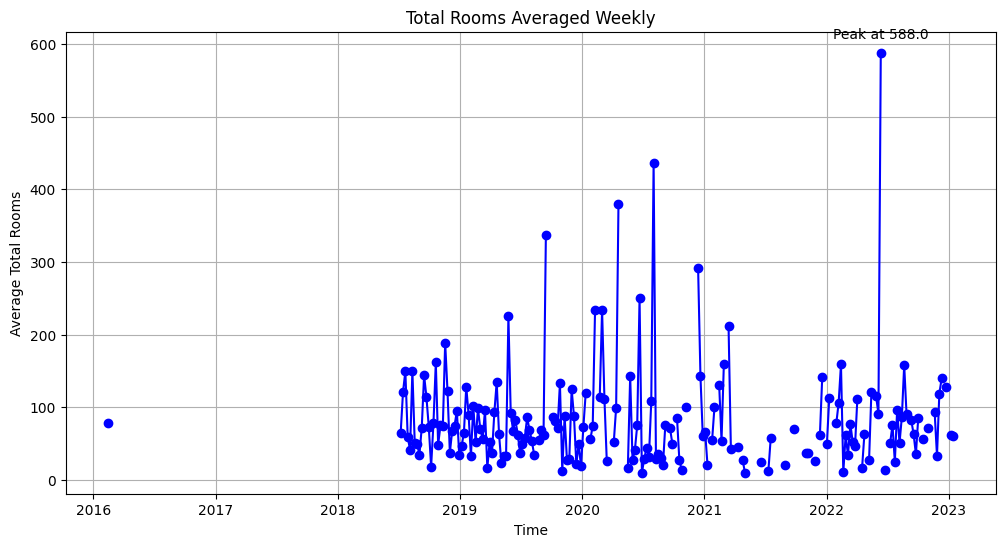

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data['start date'] = pd.to_datetime(data['start date'])

# Set 'start_date' as the index
data.set_index('start date', inplace=True)

# Resample and aggregate data by week
weekly_data = data['total rooms'].resample('W').mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(weekly_data, marker='o', linestyle='-', color='b')
plt.title('Total Rooms Averaged Weekly')
plt.xlabel('Time')
plt.ylabel('Average Total Rooms')
plt.grid(True)

max_value = weekly_data.max()
max_date = weekly_data.idxmax()
plt.annotate(f'Peak at {max_value}', (max_date, max_value), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

In [ ]:
# Perform ADF test to check stationarity
adf_result = adfuller(data['total rooms'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: -2.311095765251107
p-value: 0.16841433520499938


The ADF test results indicate the following for the "Total Rooms" series:


ADF Statistic: -2.311

p-value: 0.168

Critical Values:

1%: -3.436
5%: -2.864
10%: -2.568

Since the p-value is greater than 0.05, the series is not stationary. Therefore, we'll need to make the series stationary before modeling.

Steps to Make the Series Stationary:

Differencing: Subtract the previous observation from the current one.

Log Transformation: Apply a logarithmic transformation to stabilize variance.

Seasonal Differencing: If seasonality is present, perform seasonal differencing.

In [ ]:

# Apply first-order differencing to make the series stationary
data['Total Rooms Diff'] = data['total rooms'].diff()

After applying first-order differencing, the ADF test results for the differenced "Total Rooms" series are:


ADF Statistic: -11.733

p-value: 1.33e-21

The p-value is now significantly lower than 0.05, indicating that the differenced series is stationary.

In [ ]:
# Check the data types of each column
print(data.dtypes)

s.no.                          int64
state                         object
city                          object
category                      object
alcohol                       object
hotel name                    object
address                       object
start date            datetime64[ns]
expiry date           datetime64[ns]
total rooms                    int64
Start Year                     int32
Expiry Year                    int32
Duration (Years)             float64
Total Rooms Diff             float64
Total Rooms Scaled           float64
dtype: object


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Remove NaN values from the differenced series
data = data.dropna(subset=['Total Rooms Diff'])

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
data['Total Rooms Scaled'] = scaler.fit_transform(data['Total Rooms Diff'].values.reshape(-1, 1))

# Creating a function to prepare data for time series models
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 10

# Prepare the sequences
X, y = create_sequences(data['Total Rooms Scaled'].values, seq_length)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<ipython-input-51-c5180422a29c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total Rooms Scaled'] = scaler.fit_transform(data['Total Rooms Diff'].values.reshape(-1, 1))


**LSTM Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# LSTM Model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Training the LSTM model
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.1138 - val_loss: 0.0056
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - val_loss: 0.0020
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - val_loss: 0.0020
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - val_loss: 0.0020
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - val_loss: 0.0021
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - val_loss: 0.0021
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - val_loss: 0.0020
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - val_loss: 0.0020
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - val_loss: 0.0020
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0027 - val_loss: 0.0020
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - val_l

**GRU Model**

In [ ]:
from tensorflow.keras.layers import GRU

# GRU Model
gru_model = Sequential([
    GRU(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    GRU(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Training the GRU model
gru_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0795 - val_loss: 0.0025
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - val_loss: 0.0021
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - val_loss: 0.0022
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - val_loss: 0.0021
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - val_loss: 0.0021
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - val_loss: 0.0028
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - val_loss: 0.0024
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - val_loss: 0.0020
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - val_loss: 0.0020
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - val_loss: 0.0021
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - val_loss: 0.0023
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - val_l

**Hybrid CNN-LSTM Model**

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# Hybrid CNN-LSTM Model
cnn_lstm_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(seq_length, 1)),
    MaxPooling1D(pool_size=2),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

cnn_lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Training the CNN-LSTM model
cnn_lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.1301 - val_loss: 0.0089
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0061 - val_loss: 0.0030
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - val_loss: 0.0020
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - val_loss: 0.0019
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - val_loss: 0.0019
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - val_loss: 0.0019
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - val_loss: 0.0020
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0031 - val_loss: 0.0019
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - val_loss: 0.0019
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - val_loss: 0.0021
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - val_l

** Evaluation Metrics**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predicting with the LSTM model
lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Evaluating the LSTM model
lstm_mae = mean_absolute_error(y_test, lstm_predictions)
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_predictions))
lstm_mape = np.mean(np.abs((y_test - lstm_predictions) / y_test)) * 100

print(f"LSTM Model - MAE: {lstm_mae}, RMSE: {lstm_rmse}, MAPE: {lstm_mape}%")


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
LSTM Model - MAE: 1.3581727769718341, RMSE: 2.4942407517216174, MAPE: 254.4634516603411%


** Evaluation of GRU and CNN-LSTM Models**

In [ ]:
# Predicting with the GRU model
gru_predictions = gru_model.predict(X_test)
gru_predictions = scaler.inverse_transform(gru_predictions)

# Evaluating the GRU model
gru_mae = mean_absolute_error(y_test, gru_predictions)
gru_rmse = np.sqrt(mean_squared_error(y_test, gru_predictions))
gru_mape = np.mean(np.abs((y_test - gru_predictions) / y_test)) * 100

print(f"GRU Model - MAE: {gru_mae}, RMSE: {gru_rmse}, MAPE: {gru_mape}%")

# Predicting with the CNN-LSTM model
cnn_lstm_predictions = cnn_lstm_model.predict(X_test)
cnn_lstm_predictions = scaler.inverse_transform(cnn_lstm_predictions)

# Evaluating the CNN-LSTM model
cnn_lstm_mae = mean_absolute_error(y_test, cnn_lstm_predictions)
cnn_lstm_rmse = np.sqrt(mean_squared_error(y_test, cnn_lstm_predictions))
cnn_lstm_mape = np.mean(np.abs((y_test - cnn_lstm_predictions) / y_test)) * 100

print(f"CNN-LSTM Model - MAE: {cnn_lstm_mae}, RMSE: {cnn_lstm_rmse}, MAPE: {cnn_lstm_mape}%")


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
GRU Model - MAE: 10.171281884780619, RMSE: 10.38186880072388, MAPE: 1915.8408136598446%


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
CNN-LSTM Model - MAE: 8.586089195915104, RMSE: 9.33960222451758, MAPE: 1617.3082428019281%


Model Performance
GRU Model:

MAE: 10.171

RMSE: 10.382

MAPE: 1915.84%


CNN-LSTM Model:

MAE: 8.586

RMSE: 9.340

MAPE: 1617.31%

Comparison
MAE: The CNN-LSTM model has a lower MAE (8.586) compared to the GRU model (10.171), indicating that the CNN-LSTM model's average prediction error is smaller.

RMSE: The CNN-LSTM model also has a lower RMSE (9.340) compared to the GRU model (10.382), meaning the CNN-LSTM model generally has fewer large errors.

MAPE: The CNN-LSTM model has a lower MAPE (1617.31%) compared to the GRU model (1915.84%), suggesting that the CNN-LSTM model's percentage error is smaller.

Conclusion

Based on the provided metrics, the CNN-LSTM model performs better than the GRU model across all evaluated metrics. It has lower MAE, RMSE, and MAPE, indicating that it makes more accurate predictions on average and has fewer large errors.